In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# filler function that normalises the given input matrix
def normalise(x):
  return x/(np.sqrt(np.sum(x**2)))

In [47]:
# assume that the waves are generated for x in [0,2π]
xarr = np.arange(0,4*np.pi,0.0001)
n = len(xarr)

In [48]:
# sine wave
sine_wave = 2*np.sin(xarr)

# ramp wave (assume for a given x, the ramp wave is defined as y = x-1)
ramp_wave = []
mid = xarr[int(2*np.pi*10000)]
for x in xarr:
  if(x>mid):
    ramp_wave.append(xarr[len(xarr)-1]-x)
  else:
    ramp_wave.append(x)

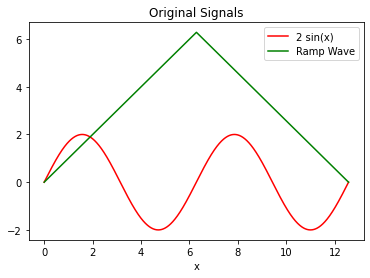

In [49]:
# plotting the sine wave and ramp wave
# define the sine wave as y = sin(x)
# and the ramp wave

plt.plot(xarr,sine_wave,color='r', label='2 sin(x)')
plt.plot(xarr,ramp_wave,color='g', label='Ramp Wave')
plt.xlabel("x")
plt.title("Original Signals")
plt.legend()
plt.show()

In [50]:
# define the mixing matrix as specified by the question:
# A = [[0.5,1]
#      [1,0.5]]
mixing_matrix = np.array([[0.5,1],[1,0.5]])

# temporary array to store the two waves together
temp = np.stack((sine_wave,ramp_wave))

# obtain the mixed signals by matrix multiplication against the mixing matrix
mixed_signal = np.dot(mixing_matrix,temp)

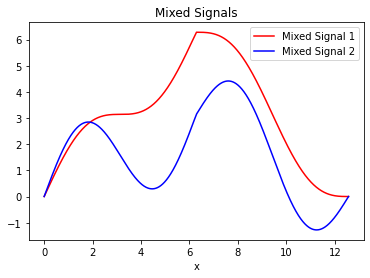

In [51]:
# plot the first mixed signal
plt.plot(xarr,mixed_signal[0],color='r',label='Mixed Signal 1')

# plot the second mixed signal
plt.plot(xarr,mixed_signal[1],color='b',label='Mixed Signal 2')

plt.xlabel("x")
plt.title("Mixed Signals")
plt.legend()
plt.show()

In [52]:
# Pre-processing = Centering + Whitening

# Centering
#   calculates mean along the columns, and subtracts it
#   from each individual entry in each column (specified by
#   reshape(-1,1) where -1 indicates the dimension of the column)
centered = mixed_signal - np.mean(mixed_signal,axis=1).reshape(-1,1)

# Whitening
#   compute the eigenvectors and eigenvalues of the covariance matrix
#   for the centered data
evals, evecs = np.linalg.eig(np.cov(centered))

#   define a diagonal matrix of eigenvalues ^ (-1/2) 
d = np.diag(float(1)/np.sqrt(evals))

#   define a whitening matrix as W = E.D.E'
#     where E' indicates transpose of E, the orthogonal-eigenvector matrix
temp = np.dot(evecs,d)
w = np.dot(temp,evecs.T)

#   multiply the centered data with the whitening matrix
whitened = np.dot(w,centered)

In [53]:
f = whitened.shape[0]
n = whitened.shape[1]

# initialise the weights vector randomly
weights = np.random.rand(f,f)

for i in range(f):
  s1 = [0.0,0.0]
  s2 = 0.0

  # update wi iteratively until convergence
  for k in range(n):

    x = np.tanh(weights[0][i]*whitened[0][k] + weights[1][i]*whitened[1][k])
    s1[0] += x * whitened[0][k]
    s1[1] += x * whitened[1][k]

    s2 += 1 - x**2

  # determine wni for each iteration
  s1[0] *= (1.0/n)
  s1[1] *= (1.0/n)
  wni = np.array([s1[0] - weights[0][i] * (s2/n), s1[1] - weights[1][i] * (s2/n)])

  # normalise wni
  wni = normalise(wni)

  # if i > 1, make wni orthogonal to all wj for j < i
  if i > 0:

    s3 = [0.0,0.0]
    for j in range(i):
      x = wni[0]*weights[0][j] + wni[1]*weights[1][j]
      s3[0] += x * weights[0][j]
      s3[1] += x * weights[1][j]
    
    # make wni orthogonal to all wj
    wni -= s3

  # normalise wni again
  wni = normalise(wni)

  # check for convergence, if yes break
  # else update wi such that wi = wni
  if(abs(weights[0][i]*wni[0] + weights[1][i]*wni[1] - 1) < 0.0001):
    break
  
  # update wi = wni
  weights[0][i] = wni[0]
  weights[1][i] = wni[1]

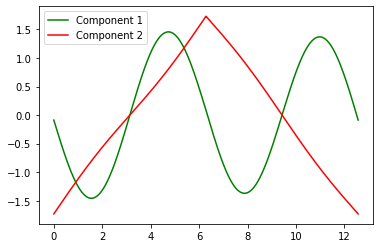

In [54]:
# multiply the whitened data with the weights matrix to obtain
# individual separated components
y = np.dot(weights,whitened)

# plot the obtained individual signals
plt.plot(xarr,y[0],color='g',label='Component 1')
plt.plot(xarr,y[1],color='r',label='Component 2')
plt.legend()
plt.show()

In [55]:
def f(x,y):
  return abs(x-37) + abs(y-142)